## 載入基本程式

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [ ]:
# 這個是最後test data的答案
gender_submission.head() 

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
# 這個是training data
train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 這個是要預測的data
test.head() 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# 先把兩邊的資料合併，下一步要來做資料清理以及特徵擷取
data = pd.concat([train, test], sort=False)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print(len(train), len(test), len(data))

891 418 1309


In [ ]:
# 這邊可以觀察到，Survived Age, Fare, Cabin, embarked有缺失值
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### 資料解說
##### Survived 會缺失 418，是因為test data中沒有包含這個資料，因此空白是很合理的
##### Age 是發生當下乘客年齡，邏輯推論，年齡會是影響生存率的一個要素，因此在後續要想辦法填充
##### fare 乘客的船票費用，合理推論也是一個關聯係數
##### Cabin 艙位號，缺失值很多 (1014/1309) 將近77%，艙位號也不是一個可以簡易填充的值
##### Embarked 登船的位置，有C/Q/S 三種位置


# 資料清理
##### 接下來1.把資料都轉換成數字的形式
##### 2.填補空缺資料

### 1. Sex

In [10]:
# 把性別用0/1做替換
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)

### 2. Embarked

In [11]:
# 因為缺失值只有兩個，所以直接用S作替代，並且轉換成數字
data['Embarked'].fillna(('S'), inplace=True)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

### 3. Fare

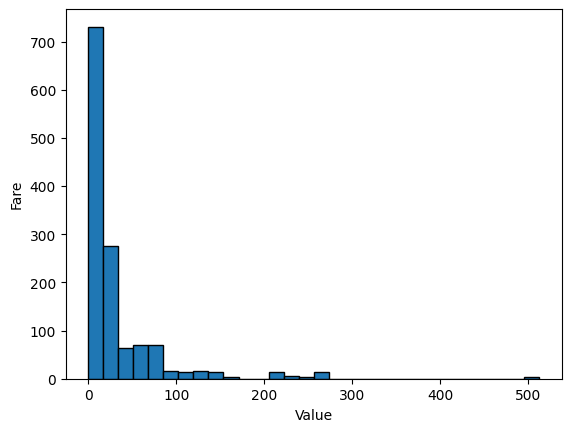

In [ ]:
# 先觀察這邊數據的分布，主要集中在0-80附近

plt.hist(data['Fare'], bins=30, edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Fare')
plt.show()

In [20]:
#只有一個缺失值，用平均值替代
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)

### 4. Age

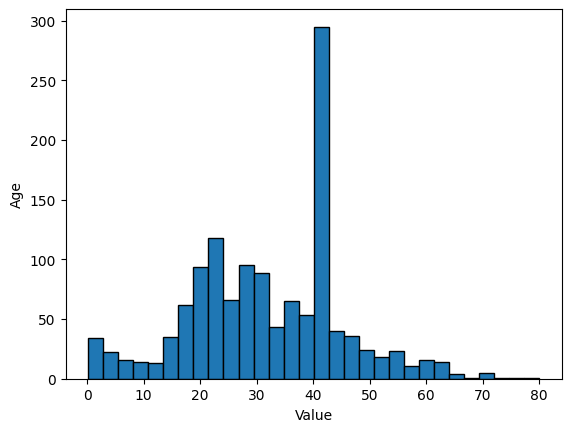

In [27]:
# 先觀察這邊數據的分布，主要集中在40出頭還有一根很高的 peak
plt.hist(data['Age'], bins=30, edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Age')
plt.show()

In [28]:
# 一次性透過平均值跟正負標準差的範圍來填補缺失值
age_avg = data['Age'].mean()
age_std = data['Age'].std()

data['Age'].fillna(np.random.randint(age_avg - age_std, age_avg + age_std), inplace=True)

In [29]:
# 刪除不需要的欄位
delete_columns = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True)

In [30]:
#再把資料分成train跟test
train = data[:len(train)]
test = data[len(train):]

In [31]:
# 拆分成測試資料跟要預測的值
y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
X_test = test.drop('Survived', axis=1)

In [32]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,3,0,35.0,8.0500,0


In [33]:
y_train.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

## 機器學習

In [34]:
from sklearn.linear_model import LogisticRegression

In [40]:
#超參數調整請見: https://medium.com/@p123456dan.mse99/sklearn%E7%9A%84logisticregression%E8%B6%85%E5%8F%83%E6%95%B8-4d2b51bdf584
logistic = LogisticRegression(penalty='l2', solver='sag', random_state=0)

In [41]:
logistic.fit(X_train, y_train)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=0, solver='sag')

In [42]:
y_pred = logistic.predict(X_test)

In [43]:
y_pred[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0.])

## 檢查訓練結果

In [45]:
from sklearn.metrics import accuracy_score

In [48]:
score = accuracy_score(gender_submission['Survived'], y_pred)
print('Accuracy: %.2f' % score)

Accuracy: 0.66


In [57]:
# Get the coefficients of the model
coefficients = logistic.coef_
x_col = X_train.columns
for i in range(len(x_col)):
    print(f'Coefficients of {x_col[i]}:{coefficients[0][i]}')

Coefficients of Pclass:-0.12378372175598534
Coefficients of Sex:0.13874730969794488
Coefficients of Age:-0.02070099528963512
Coefficients of Fare:0.01352903866612691
Coefficients of Embarked:0.040591517991100216


## 觀察權重與思考

以66%的準確率其實不算高，這邊可以透過特徵擷取以及超參數調整來提升準確率

Pclass 是負權重，表示越次等票，存活率越低

Male當初設定0是男性，1是女性，所以男性是負權重，表示男性存活率較低

Age呈現負相關，但權重不大

Fare票價正相關，但權重沒有到很大

Embarked是正相關，但權重不大，這邊比較可以討論的是直接使用012的方式替代不同港口，另一種方式是使用one-hot encode

## 提出

In [ ]:
sub = pd.read_csv('../input/titanic/gender_submission.csv')
sub['Survived'] = list(map(int, y_pred))
sub.to_csv('submission.csv', index=False)